In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in file

In [206]:
#this file is before modifying to get at least 1% prevalence
onepercent = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv")
df = pd.read_csv(onepercent)
df

,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef50_A0A023JMK3,169066,NaN,AHL26139.1,['Homo sapiens'],homo sapiens,Human rhinovirus sp.,species,9606,species,QCMFVPPGAPIPKKRDDYTWQSGTNASVFWQQGQTYPRFSIPFSSI...,187
1,UniRef50_A0A023NLN1,3052707,NaN,AHX03037.1,['dog'],canis lupus,Protoparvovirus carnivoran1,species,9612,species,GAVQPDGGQPAVRNERATGSGNGSGGGGGGGSGGVGISTGTFNNQT...,262
2,UniRef50_A0A023SDL2,28875,NaN,AHX71698.1,['pig'],pig,Rotavirus A,species,9823,species,EVIKENSYVYVDYWDDSKAFRNMVYVRSLAANLNSVKCTGGSYNFS...,168
3,UniRef50_A0A023SG76,10407,"[9606, 9598]",AHX73937.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,HLVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAES...,175
4,UniRef50_A0A023T4I6,10407,"[9606, 9598]",AHX82176.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,MDDVVLGAKSVQHLESLFTSITNFLLSLGIHLNPNKTKRWGYSLHF...,148
...,...,...,...,...,...,...,...,...,...,...,...,...
15273,UniRef50_X5FVI6,36363,"[8180, 55118, 8012, 8162, 8165, 30942, 30948]",AHW84102.1,['paradise fish'],paradise fish,Lymphocystis disease virus 1,species,158451,species,INNSQIITVSNVDGDVDVSDVYFVQQIDVNVKSLMNVLSQQKAQQD...,127
15274,UniRef50_W6B0R5,442302,NaN,AHI59989.1,['pig'],pig,Porcine picobirnavirus,species,9823,species,MTANQIKWAELKESGRHNRETESQGRTMLTETQRHNVASESISRSQ...,178
15275,UniRef50_W6B0R9,442302,NaN,AHI59994.1,['pig'],pig,Porcine picobirnavirus,species,9823,species,MEANMKDNDKSKFIKKESRRNGANGKAAGNKRPPRKRTNTNNCDLD...,545
15276,UniRef50_W6D6C9,10497,"[6937, 6938, 85517, 41426, 273792, 9823]",AHI95943.1,['domestic pig'],sus scrofa,African swine fever virus,species,9823,species,SYGKPDPEPTLSQIEETHMVHFNAHFKPYVPVGFEYNKVRPHTGTP...,86


# NonIDV Host

In [207]:
n = df.shape[0]
n

15278

In [208]:
def get_label(pct, threshold):
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

In [209]:
def get_data_for_pie_chart(df, col_name, n, threshold):
    count_data = df[col_name].value_counts().to_dict() #occurrences in the dictionary
    #counts = {'Flu':4,'Cold':2..etc}
    label_data = {} #dictionary with labels
    prevalence_data = {} #dictionary with prevalence
    for k, v in count_data.items(): #k = key(name), v = value(count)
        prevalence = v/n*100 #count coverted to percentage for prevalence
        prevalence_data[k] = f"{k} ({prevalence:.2f}%)" #2 decimal places
        if prevalence <= threshold: #if the prevalence we want is less than or equal to the threshold, 
            #it will be represented with three decimal places
            prevalence_data[k] = f"{k} ({prevalence:.3f}%)"
            label_data[k] = "" #will be blank if less than threshold
        else:
            label_data[k] = k
    return count_data, label_data, prevalence_data

In [210]:

count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_name", n=df.shape[0], threshold=1.0)
#prevalence_data #shows all percentages of occurrence

In [211]:
#count_data #frequency of each virus

In [212]:
#label_data #represent the virus name if it is above the correct threshold
#the blank spaces are there if the virus is not more than 1%, otherwise, it'll display as
#name:name

# Distribution of Virus Hosts

In [213]:
count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_host_name", n=n, threshold=.1)
others_hosts = []
for k,v in count_data.items():
    if (v/n*100) <= 2.0: #changing it to 2% prevalence
       # print(v/n*100)
        others_hosts.append(k)
        print(k, ":", (v/n*100))
        
df["virus_host_name_mod"] = df["virus_host_name"].apply(lambda x: x if x not in others_hosts else f"Others ({len(others_hosts)} hosts)")
count_data, label_data, prevalence_data = get_data_for_pie_chart(df[~df["virus_host_name"].isin(others_hosts)], col_name="virus_host_name_mod", n=n, threshold=0.1)

gallus gallus : 1.8654274119649168
eulemur fulvus : 1.4857965702317057
peromyscus boylii : 1.3745254614478335
gopherus morafkai : 1.3417986647466946
theropithecus gelada : 1.2501636339835058
sheep : 1.1650739625605446
gymnorhina tibicen : 1.0407121350962167
bufo bufo : 1.0014399790548503
mareca americana : 0.857442073569839
corvus bennetti : 0.7068988087446001
petroica australis : 0.7003534494043723
dipodomys merriami : 0.6872627307239167
gorilla gorilla : 0.6872627307239167
lates calcarifer : 0.6872627307239167
eulemur coronatus : 0.6741720120434611
chicken : 0.6087184186411834
rousettus aegyptiacus : 0.5956276999607278
oryzomys sp. : 0.5759916219400445
bos taurus : 0.5694462625998167
canis lupus : 0.5367194658986778
anas superciliosa : 0.4516297944757167
crocodilurus amazonicus : 0.43853907579526114
wild boar : 0.43199371645503337
eidolon helvum : 0.42544835711480555
callorhinus ursinus : 0.4189029977745778
mandarin fish : 0.4189029977745778
chinook salmon : 0.41235763843435
crocodyl

In [214]:
#prevalence_data #shows distribution of hosts with more than 1% prevalence

In [215]:
#count_data #how often each virus host appears

In [216]:

n_others = df[df['virus_host_name'].isin(others_hosts)].shape[0]
prevalence_data["Hosts with prevalence <= 1%"] = f"Hosts with prevalence <= 2%\n{len(others_hosts)} hosts ({n_others/n*100:.2f}%)"
count_data["Hosts with prevalence <= 1%"] = n_others
prevalence_data #shows hosts with at least 1% prevalence and then categorized those under htis threshold in a separate category

{'homo sapiens': 'homo sapiens (23.24%)',
 'sus scrofa': 'sus scrofa (4.77%)',
 'hydrochoerus hydrochaeris': 'hydrochoerus hydrochaeris (3.96%)',
 'propithecus coquereli': 'propithecus coquereli (2.76%)',
 'marmota himalayana': 'marmota himalayana (2.62%)',
 'cyprinus carpio': 'cyprinus carpio (2.61%)',
 'varecia variegata': 'varecia variegata (2.38%)',
 'Hosts with prevalence <= 1%': 'Hosts with prevalence <= 2%\n930 hosts (57.66%)'}

In [217]:
#count_data

In [218]:
pie_hosts = ["homo sapiens","sus scrofa","hydrochoerus hydrochaeris","propithecus coquereli","marmota himalayana","cyprinus carpio","varecia variegata"] 


# Distribution of Hosts

8809


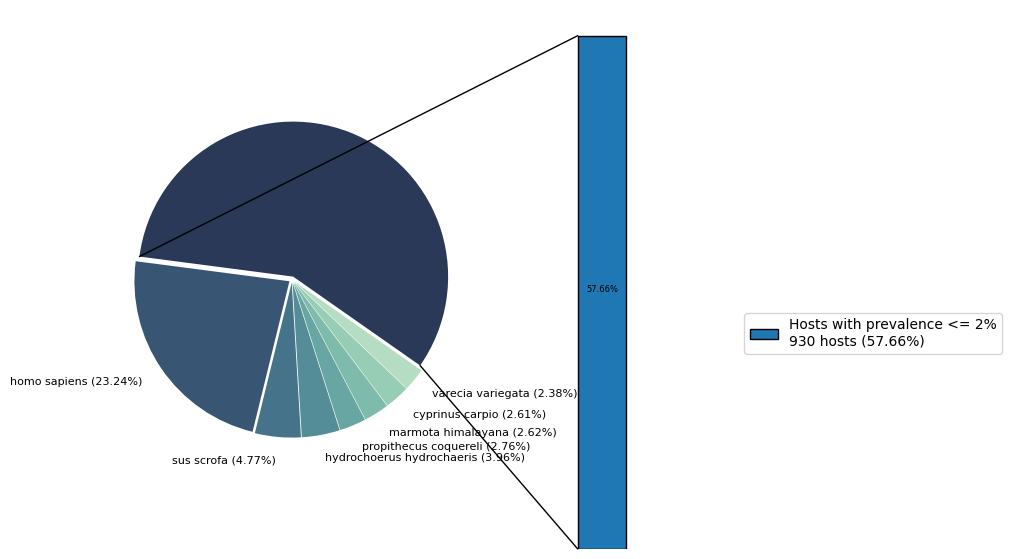

In [219]:
from matplotlib.patches import ConnectionPatch

#if running multiple times, make sure to refresh website and run only once or else it'll run multiple times and pop the pie host off
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 7))
fig.subplots_adjust(wspace= -0.2) #space between the plots

# pie chart parameters
explode_val = 0.02
pie_values = [df[~df['virus_host_name'].isin(pie_hosts)].shape[0]]
pie_labels = [""]
explode = [explode_val]
for pie_host in pie_hosts:

    if pie_host in count_data and pie_host in prevalence_data:
        pie_values.append(count_data[pie_host])
        pie_labels.append(prevalence_data[pie_host])
        explode.append(explode_val)
        count_data.pop(pie_host)
    else:
        print(f"{pie_host} not found!")

# rotate so that first wedge is split by the x-axis
#angle = -180 * overall_ratios[0]
wedges, texts = ax1.pie(
    pie_values,
    startangle=-35,
    labels=pie_labels,
    explode=explode,
    colors=sns.cubehelix_palette(rot=-0.4, gamma=.8, n_colors=len(pie_labels)+1, reverse=True),
    labeldistance=1.15,  # more space between center and labels
    textprops={'fontsize': 8}  # smaller labels
)
# bar chart parameters
bar_values = [i for i in reversed(count_data.values())]
bar_labels = [i for i in reversed(count_data.keys())]
bottom = 1
width = 10.1
bar_total = sum(bar_values)

print(bar_total)
# Adding from the top matches the legend.
for j, (val, label) in enumerate(reversed([*zip(bar_values, bar_labels)])):
    height = val / bar_total
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=prevalence_data[label], edgecolor="black",
                 alpha=1-(1/len(bar_labels) * j))
    ax2.bar_label(bc, labels=[f"{val/n*100:.2f}%"], label_type='center', padding = 2, fontsize = 6)

ax2.legend(loc="center",
          bbox_to_anchor=(1.2, 0.4))
ax2.axis('off')
ax2.set_xlim(-4*width, 4*width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = 1

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)
#plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/iv_hosts_pie_bar.pdf"), bbox_inches="tight", dpi=600)
plt.show()

In [220]:
count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_host_name", n=n, threshold=1)
others_hosts = []
for k,v in count_data.items():
    if (v/n*100) <= 2.0: #viruses under 2% prevalence get put in their own category
        others_hosts.append(k)
        
df["virus_host_name_mod"] = df["virus_host_name"].apply(lambda x: x if x not in others_hosts else f"Rare ({len(others_hosts)} hosts)")

count_data, label_data, prevalence_data = get_data_for_pie_chart(df[~df["virus_host_name"].isin(others_hosts)], col_name="virus_host_name_mod", n=n, threshold=0.01)
prevalence_data

{'homo sapiens': 'homo sapiens (23.24%)',
 'sus scrofa': 'sus scrofa (4.77%)',
 'hydrochoerus hydrochaeris': 'hydrochoerus hydrochaeris (3.96%)',
 'propithecus coquereli': 'propithecus coquereli (2.76%)',
 'marmota himalayana': 'marmota himalayana (2.62%)',
 'cyprinus carpio': 'cyprinus carpio (2.61%)',
 'varecia variegata': 'varecia variegata (2.38%)'}

In [221]:

n_others = df[df['virus_host_name'].isin(others_hosts)].shape[0]
prevalence_data["Hosts with prevalence <= 2%"] = f"Hosts with prevalence <= 2% ({len(others_hosts)} hosts)\n({n_others/n*100:.2f}%)"
prevalence_data

count_data

{'homo sapiens': 3551,
 'sus scrofa': 729,
 'hydrochoerus hydrochaeris': 605,
 'propithecus coquereli': 421,
 'marmota himalayana': 401,
 'cyprinus carpio': 398,
 'varecia variegata': 364}

In [222]:
count_data["Hosts with prevalence <= 2%"] = n_others
count_data
#hosts that have prevalence less than 1% are put into n_others

{'homo sapiens': 3551,
 'sus scrofa': 729,
 'hydrochoerus hydrochaeris': 605,
 'propithecus coquereli': 421,
 'marmota himalayana': 401,
 'cyprinus carpio': 398,
 'varecia variegata': 364,
 'Hosts with prevalence <= 2%': 8809}

23.242570459842682
4.771567136049271
3.9599422365427017
2.755596302449703
2.624689042568207
2.605053037405014
2.3825107142329216
57.65807032585144


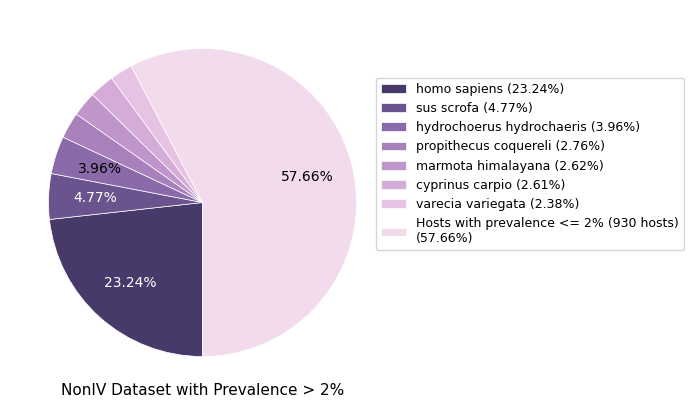

In [223]:
fig, ax = plt.subplots(figsize=(8, 5))

def get_label(pct, threshold):
    print(pct)
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

threshold=1.0
wedges, texts, autotexts = ax.pie(count_data.values(), autopct=lambda pct: get_label(pct, threshold=3), 
                                  pctdistance=.7, labeldistance=.7, counterclock=False, startangle=-90,
                                  colors=sns.cubehelix_palette(rot=.2, gamma=.7, n_colors=len(count_data), reverse=True), 
                                  wedgeprops={"linewidth": .5, "edgecolor": "white"})

ax.legend(wedges, prevalence_data.values(),
          title="",
          loc="center",
          fontsize = 9,
          bbox_to_anchor=(1.35, .6), ncol=1)
plt.setp(autotexts, size=10, color="black")
plt.setp(autotexts[0], size=10, color="white")
plt.setp(autotexts[1], size=10, color="white")
plt.setp(autotexts[-1], size=10, color="black")
ax.set_title("NonIV Dataset with Prevalence > 2%", fontsize=11, y=0, pad=0)
output_pdf = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/prevalence_piecharts.pdf")
plt.savefig(output_pdf, dpi = 900)
plt.show()

# Distribution of Hosts Findings:

<div class="alert alert-block alert-info">
<b>#Hosts:</b> After filtering the dataset to only show hosts with prevalence above 2%,
We have seven common hosts and 930 hosts that have prevalence <= 2%. Cleaner data set!
</div>

# Distribution of Viruses

In [224]:
count_data, label_data, prevalence_data = get_data_for_pie_chart(df, col_name="virus_name", n=n, threshold=.1)
others_virus = []
for k,v in count_data.items():
    if (v/n*100) <= 2.0:
        others_virus.append(k)
        print(k, ":", (v/n*100))
        
df["virus_name_mod"] = df["virus_name"].apply(lambda x: x if x not in others_virus else f"Others ({len(others_virus)} virus)")
count_data, label_data, prevalence_data = get_data_for_pie_chart(df[~df["virus_name"].isin(others_virus)], col_name="virus_name_mod", n=n, threshold=0.1)

Human betaherpesvirus 6 : 1.2959811493651001
Dulem virus 42 : 1.2436182746432778
Orthopoxvirus vaccinia : 1.1192564471789501
Orf virus : 1.0079853383950779
Bufonid herpesvirus 1 : 1.0014399790548503
Picobirnavirus sp. : 0.8770781515905223
Magpiepox virus 2 : 0.7134441680848279
Crowpox virus : 0.7068988087446001
Rotavirus A : 0.7003534494043723
Human papillomavirus : 0.6872627307239167
Riboviria sp. : 0.6872627307239167
BeAn 58058 virus : 0.5759916219400445
Scale drop disease virus : 0.5563555439193612
Porcine torovirus : 0.5498101845791333
Geladintestivirus 1 : 0.5301741065584501
Dulem virus 36 : 0.4712658724964001
Torque teno virus : 0.4647205131561723
Dulem virus 40 : 0.44508443513548895
Teiidae poxvirus 1 : 0.43853907579526114
Otarine gammaherpesvirus 4 : 0.4189029977745778
Mandarin fish ranavirus : 0.4189029977745778
Erythrocytic necrosis virus : 0.41235763843435
Saltwater crocodilepox virus : 0.3992669197538945
Paslahepevirus balayani : 0.3992669197538945
Cowpox virus : 0.39926691

In [225]:
prevalence_data

{'Hepatitis B virus': 'Hepatitis B virus (7.39%)',
 'Marmot picobirnavirus': 'Marmot picobirnavirus (2.61%)',
 'Carp edema virus': 'Carp edema virus (2.52%)',
 'African swine fever virus': 'African swine fever virus (2.49%)',
 'Bacteriophage sp.': 'Bacteriophage sp. (2.35%)',
 'Hepacivirus hominis': 'Hepacivirus hominis (2.19%)'}

In [226]:
count_data

{'Hepatitis B virus': 1129,
 'Marmot picobirnavirus': 398,
 'Carp edema virus': 385,
 'African swine fever virus': 381,
 'Bacteriophage sp.': 359,
 'Hepacivirus hominis': 334}

In [227]:
others = df[df['virus_name'].isin(others_virus)].shape[0] #the amt of viruses with less than 1%
prevalence_data["Viruses with prevalence <= 2%"] = f"Viruses with prevalence <= 2% {len(others_virus)} viruses ({others/n*100:.2f}%)"
count_data["Viruses with prevalence <= 2%"] = others
prevalence_data

{'Hepatitis B virus': 'Hepatitis B virus (7.39%)',
 'Marmot picobirnavirus': 'Marmot picobirnavirus (2.61%)',
 'Carp edema virus': 'Carp edema virus (2.52%)',
 'African swine fever virus': 'African swine fever virus (2.49%)',
 'Bacteriophage sp.': 'Bacteriophage sp. (2.35%)',
 'Hepacivirus hominis': 'Hepacivirus hominis (2.19%)',
 'Viruses with prevalence <= 2%': 'Viruses with prevalence <= 2% 2740 viruses (80.46%)'}

In [228]:
pie_viruses = ["Hepatitis B Virus", "Marmot picobirnavirus", "Carp edema virus", "African swine fever virus", "Bacteriophage sp.", "Hepaciviris hominis"]

7.38971084356308
2.605053037405014
2.5199633091688156
2.4937819689512253
2.3497840389609337
2.1861501038074493
80.4555594921112


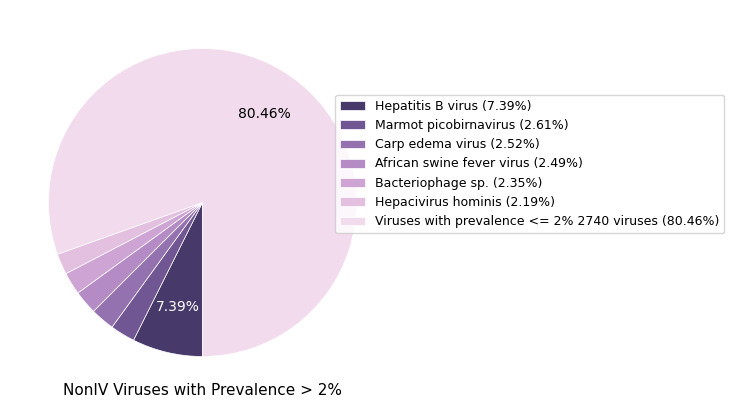

In [229]:
fig, ax = plt.subplots(figsize=(8, 5))

def get_label(pct, threshold):
    print(pct)
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

threshold=1.0
wedges, texts, autotexts = ax.pie(count_data.values(), autopct=lambda pct: get_label(pct, threshold=3), 
                                  pctdistance=.7, labeldistance=.7, counterclock=False, startangle=-90,
                                  colors=sns.cubehelix_palette(rot=.2, gamma=.7, n_colors=len(count_data), reverse=True), 
                                  wedgeprops={"linewidth": .5, "edgecolor": "white"})

ax.legend(wedges, prevalence_data.values(),
          title="",
          loc="center",
          fontsize = 9,
          bbox_to_anchor=(1.35, .6), ncol=1)
plt.setp(autotexts, size=10, color="black")
plt.setp(autotexts[0], size=10, color="white")
plt.setp(autotexts[1], size=10, color="white")
plt.setp(autotexts[-1], size=10, color="black")
ax.set_title("NonIV Viruses with Prevalence > 2%", fontsize=11, y=0, pad=0)
output_pdf = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/prevalence_piecharts.pdf")
plt.savefig(output_pdf, dpi = 900)
plt.show()

# Distribution of Viruses Findings:

<div class="alert alert-block alert-info">
<b>#Viruses:</b> After filtering the dataset to only show viruses with prevalence above 2%,
We have six common hosts and 2740 viruses that have prevalence <= 2%. Cleaner data set!
</div>

# Hosts of Bacteriophage sp.

<b>Bacteriophage:</b>
A virus that infects and replicates within bacteria,
so why is it one of the most common viruses for our uniref50 hosts?

In [230]:
def find_bacteriophage(df):
    filtered = df[df["virus_name"] == "Bacteriophage sp."]
    hosts = filtered["virus_host_name"]
    unique = hosts.unique()

    print(f"Number of hosts: {len(unique)}")
    print(f"Number of occurrences: {len(hosts)}")
    for host in hosts:
        print(unique)
    return filtered

In [231]:
#Printing the dataframe only
def bacteria_df(df):
    filter = df[df["virus_name"] == "Bacteriophage sp."]

    return filter

In [232]:
bacteria_df(df)

,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len,virus_host_name_mod,virus_name_mod
6432,UniRef50_H7BUJ1,38018,NaN,AFB75486.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MATFIPLLLICFPTSCLSIFLPLQNDNPIIPAGFSPSYNVNKAISL...,50,homo sapiens,Bacteriophage sp.
6433,UniRef50_H7BUJ4,38018,NaN,AFB75489.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MGRVVYDTIVGMPFSDMMFAIVVLPLPDGPTIVIITGIFAFIFIICL,47,homo sapiens,Bacteriophage sp.
6434,UniRef50_H7BUK2,38018,NaN,AFB75497.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MILTYLILLLILQIINIIIKYILYICNTVIYIFIQKIFLVLF,42,homo sapiens,Bacteriophage sp.
6435,UniRef50_H7BUK4,38018,NaN,AFB75499.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MGECSANNIFAFHESEGSFFNADFPTVLRAAFKARLQEVTAFSLVT...,57,homo sapiens,Bacteriophage sp.
6436,UniRef50_H7BUK6,38018,NaN,AFB75501.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MSGRSFSDCAPLVFRAFFCGVLVSFCCSETFSLGLFF,37,homo sapiens,Bacteriophage sp.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,UniRef50_H7BWF0,38018,NaN,AFB76145.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MNSGTKKTLPKERLPVPYINRRVDAQVHNDVIPYIFLADSCT,42,homo sapiens,Bacteriophage sp.
6794,UniRef50_H7BWF1,38018,NaN,AFB76146.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MFVRAAFIVGHFDFDYFFQVDSQVSAKVRDPDHRVSQFDGHAFGLS...,262,homo sapiens,Bacteriophage sp.
6795,UniRef50_H7BWF2,38018,NaN,AFB76147.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MAVVSFNSSGRIIPSATALSSARAKDAPTRTIPRVIVNSPILNLFS...,300,homo sapiens,Bacteriophage sp.
6796,UniRef50_H7BWF3,38018,NaN,AFB76148.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MSFSVNWYVWKFAFIFPRSTLKKKSLSALIPIKMTFAFTGFRRYMT,46,homo sapiens,Bacteriophage sp.


In [233]:
find_bacteriophage(df)
#Total occurrences = 359

Number of hosts: 1
Number of occurrences: 359
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['homo sapiens']
['

,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len,virus_host_name_mod,virus_name_mod
6432,UniRef50_H7BUJ1,38018,NaN,AFB75486.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MATFIPLLLICFPTSCLSIFLPLQNDNPIIPAGFSPSYNVNKAISL...,50,homo sapiens,Bacteriophage sp.
6433,UniRef50_H7BUJ4,38018,NaN,AFB75489.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MGRVVYDTIVGMPFSDMMFAIVVLPLPDGPTIVIITGIFAFIFIICL,47,homo sapiens,Bacteriophage sp.
6434,UniRef50_H7BUK2,38018,NaN,AFB75497.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MILTYLILLLILQIINIIIKYILYICNTVIYIFIQKIFLVLF,42,homo sapiens,Bacteriophage sp.
6435,UniRef50_H7BUK4,38018,NaN,AFB75499.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MGECSANNIFAFHESEGSFFNADFPTVLRAAFKARLQEVTAFSLVT...,57,homo sapiens,Bacteriophage sp.
6436,UniRef50_H7BUK6,38018,NaN,AFB75501.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MSGRSFSDCAPLVFRAFFCGVLVSFCCSETFSLGLFF,37,homo sapiens,Bacteriophage sp.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,UniRef50_H7BWF0,38018,NaN,AFB76145.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MNSGTKKTLPKERLPVPYINRRVDAQVHNDVIPYIFLADSCT,42,homo sapiens,Bacteriophage sp.
6794,UniRef50_H7BWF1,38018,NaN,AFB76146.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MFVRAAFIVGHFDFDYFFQVDSQVSAKVRDPDHRVSQFDGHAFGLS...,262,homo sapiens,Bacteriophage sp.
6795,UniRef50_H7BWF2,38018,NaN,AFB76147.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MAVVSFNSSGRIIPSATALSSARAKDAPTRTIPRVIVNSPILNLFS...,300,homo sapiens,Bacteriophage sp.
6796,UniRef50_H7BWF3,38018,NaN,AFB76148.1,['Homo sapiens'],homo sapiens,Bacteriophage sp.,species,9606,species,MSFSVNWYVWKFAFIFPRSTLKKKSLSALIPIKMTFAFTGFRRYMT,46,homo sapiens,Bacteriophage sp.


# Findings:

<b>Hosts of Bacteriophage sp. </b>
I found that there is actually only one host for this bacteria infecting virus, and that is
homosapiens. It occurs 359 times.
From one experiment, maybe the virus infected bacteria in the human!

# 2% DataFrame

In [234]:
two_percent = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_twopercent.csv")
filter_two = pd.read_csv(two_percent)
filter_two

,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef50_A0A023JMK3,169066,NaN,AHL26139.1,['Homo sapiens'],homo sapiens,Human rhinovirus sp.,species,9606,species,QCMFVPPGAPIPKKRDDYTWQSGTNASVFWQQGQTYPRFSIPFSSI...,187
1,UniRef50_A0A023SG76,10407,"[9606, 9598]",AHX73937.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,HLVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAES...,175
2,UniRef50_A0A023T4I6,10407,"[9606, 9598]",AHX82176.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,MDDVVLGAKSVQHLESLFTSITNFLLSLGIHLNPNKTKRWGYSLHF...,148
3,UniRef50_A0A023UHS9,28875,NaN,AHY02356.1,['Homo sapiens'],homo sapiens,Rotavirus A,species,9606,species,ITLYYYQQTDEANKWISMGSSCTVKVCPLNTQTLGIGCLTTDPSTF...,117
4,UniRef50_A0A023UJ63,28875,NaN,AHY02390.1,['Homo sapiens'],homo sapiens,Rotavirus A,species,9606,species,QAFRKGIIMGLDILANMTNDAKVIQTLNLYKQTQINLMDSYVQIPD...,96
...,...,...,...,...,...,...,...,...,...,...,...,...
6464,UniRef50_W6A915,1335626,NaN,AHI48725.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,613
6465,UniRef50_W6A935,1335626,NaN,AHI48745.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,KALQTYSETGSDLLYQPPNCSITSGVLQSGLVKMSHPSGDVEACMV...,1172
6466,UniRef50_W6A938,1335626,NaN,AHI48750.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,LKALQKAVNIAKNAYEKDKAVARKLERMADQAMTSMYKQARAEDKX...,880
6467,UniRef50_W6A976,1335626,NaN,AHI48785.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,YFTLGCKILTLTPRNKWSGVSDLSLKQKLLYTFYGKESLENPTYIY...,315


<b>2% Prevalence Dataframe</b>

When we filter the dataset so it only shows us hosts with over 2% prevalence rate, we are left with 6,469 sequences.